# 7B Science Olympiad
## Wheeled Vehicle 2023-2024 season

### Car trajectory
For the given car dimensions, calculate the theoretical control variables
to steer through bonus cans and stop on the target

© 2023 Coach Isaac, for 7B Wheeled Vehicle team use only

In [108]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [109]:
car_design = "7B Team Orange"
# front to back distance between axles in m
wheelbase = 0.39
# width of car, to fit between cans in m
car_width = 0.15
# width from wheel edge to wheel edge, for steering angle in m
wheel_distance = 0.12
# wheel diameter in m
wheel_diameter = 0.120
# mm per turn for M2.5 screw
steering_pitch = 0.35

# 0.5 m spaced target distances between 8 m and 12 m
target_distance = np.linspace(8, 12, 9)

In [110]:
start = 0 + 0j
can = -1 + (target_distance / 2) * 1j
end = 0 +  target_distance * 1j
# calculate circle defined by center and radius from 3 points
w = (end - start)/(can + car_width - start)
c = (can + car_width - start) * (w - np.abs(w)**2)/(2j * w.imag) + start
r = np.abs(start - c)
# Distance the car travels to get to the target
arc_length = np.arcsin(target_distance / 2 / r) * 2 * r
# car angle is tangent to circle at start point, w.r.t. center line in degrees
angle = 90 + np.arctan2(-c.real, c.imag) * 180/np.pi
aimer_position = np.tan(angle*np.pi/180)*target_distance/2 - 1
# steering angle in degrees
steering_angle = np.arcsin(wheelbase/r) * 180 / np.pi
# steering adjustment in mm
steering_adjust = np.tan(steering_angle / 180 * np.pi) * wheel_distance * 1000
# in turns for adjustment on left side.  Right side is left fixed at +5mm
steering_screw = (5 - steering_adjust) / steering_pitch

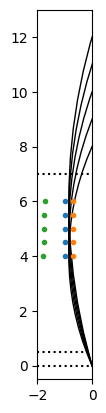

In [111]:
# show circle tracks
for center, radius in zip(c[::2], r[::2]):
    circle = plt.Circle((center.real, center.imag), radius, fill=False)
    plt.gca().add_artist(circle)
# show can positions
plt.plot(can.real[::2], can.imag[::2], '.')
# use 2x car width to give more space
plt.plot(can.real[::2] + car_width*2, can.imag[::2], '.')
# aimer position
plt.plot(-1 - aimer_position[::2], can.imag[::2], '.')
plt.gca().set_aspect(1)
# start
plt.axhline(0, ls=":", color="k")
# timing start
plt.axhline(0.5, ls=":", color="k")
# timing stop
plt.axhline(7, ls=":", color="k")
plt.xlim(-2.0, 0)
plt.ylim(-0.5, 13);

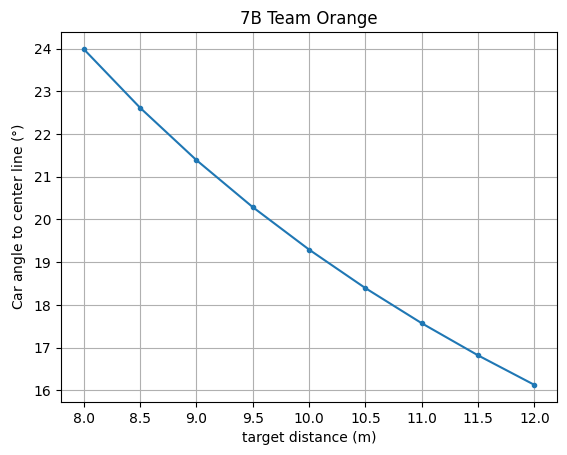

In [112]:
plt.plot(target_distance, angle, '.-')
plt.grid(True)
plt.ylabel("Car angle to center line ($\degree$)")
plt.xlabel("target distance (m)")
plt.title(car_design);

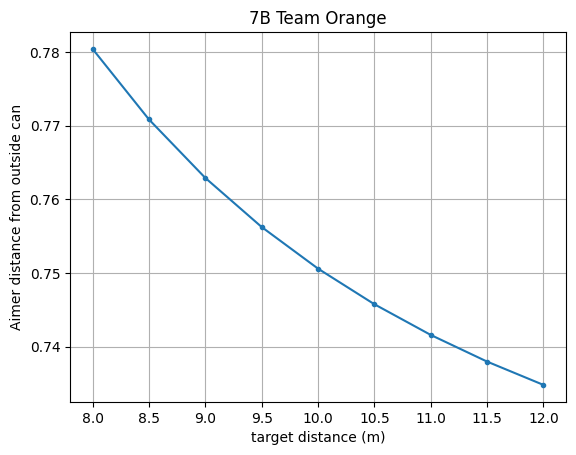

In [113]:
plt.plot(target_distance, aimer_position, '.-')
plt.grid(True)
plt.ylabel("Aimer distance from outside can")
plt.xlabel("target distance (m)")
plt.title(car_design);

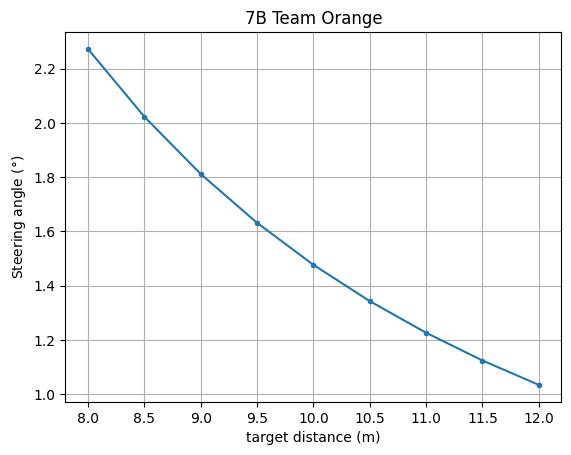

In [114]:
plt.plot(target_distance, steering_angle, '.-')
plt.grid(True)
plt.ylabel("Steering angle ($\degree$)")
plt.xlabel("target distance (m)")
plt.title(car_design);

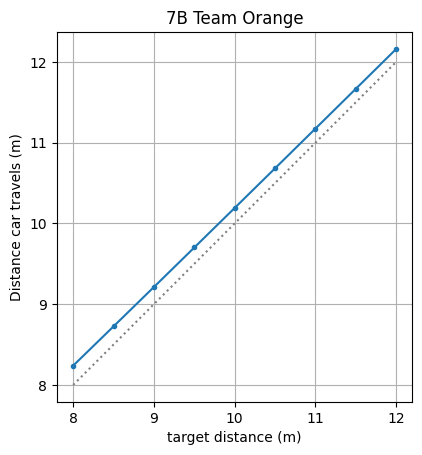

In [115]:
plt.plot(target_distance, arc_length, '.-')
plt.plot(target_distance, target_distance, ':', color="gray")
plt.gca().set_aspect(1)
plt.grid(True)
plt.ylabel("Distance car travels (m)")
plt.xlabel("target distance (m)")
plt.title(car_design);

In [116]:
# display cheatsheet
pd.options.display.float_format = "{:,.1f}".format
df = pd.DataFrame({"target distance (m)": target_distance,
              #"drive distance (m)": arc_length,
              "brake wheel turns": arc_length / np.pi / wheel_diameter,
              #"circle radius": r,
              #"car angle (°)": angle,
              "aimer position (cm)": aimer_position*100,
              #"steering angle (°)": steering_angle,
              "steering screw (turns)": steering_screw,
})
df

,target distance (m),brake wheel turns,aimer position (cm),steering screw (turns)
0,8.0,21.9,78.0,0.7
1,8.5,23.1,77.1,2.2
2,9.0,24.4,76.3,3.4
3,9.5,25.7,75.6,4.5
4,10.0,27.0,75.1,5.4
5,10.5,28.3,74.6,6.2
6,11.0,29.6,74.2,6.9
7,11.5,30.9,73.8,7.6
8,12.0,32.3,73.5,8.1
